In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    'figure.figsize': (4.8, 2.7), 'font.size': 15, 'lines.linewidth': 2,
    'xtick.labelsize': 'small', 'ytick.labelsize': 'small',
    'axes.spines.top': False, 'axes.spines.right': False,
    'savefig.dpi': 600,
})

import numpy as np

rng = np.random.default_rng()

# Build an arena

Position inside arena will be discretized according to a hexagonal grid.

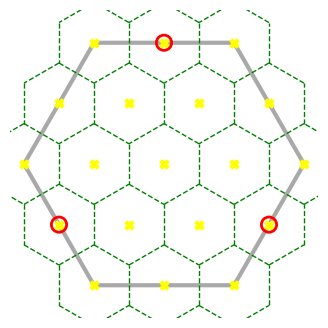

In [2]:
from hexarena.arena import Arena

arena = Arena(2)
_, ax = plt.subplots(figsize=(4, 4))
arena.plot_map(ax)

# Build a food box

MovieWriter ffmpeg unavailable; using Pillow instead.


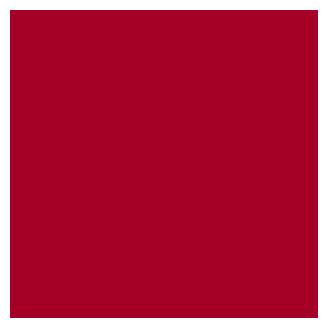

In [3]:
from hexarena.box import FoodBox

box = FoodBox(num_grades=20, resol=5, sigma_c=0.2)
observation, _ = box.reset()

fig, ax = plt.subplots(figsize=(4, 4))
h = ax.imshow(observation, vmin=0, vmax=box.num_grades-1, cmap='RdYlBu_r')
ax.set_axis_off()

from matplotlib.animation import FuncAnimation

def init():
    observation, _ = box.reset()
    h.set_data(observation)
    return h,

def update(i):
    observation, *_ = box.step(0)
    h.set_data(observation)
    return h,

num_frames = 80
ani = FuncAnimation(fig, update, frames=range(num_frames), init_func=init, blit=True)
ani.save('color-cues.gif')